

# Automating utilisation report using Python
*By Mark J. Hantic*

**Automating tasks** refers to the process of using technology or software to perform a task or series of tasks without the need for manual intervention. It is often used to perform repetitive or time-consuming tasks.

**Some of the benefits of automating tasks include:**

* **Reducing the time required to complete a task**: Automating tasks can significantly reduce the time it takes to complete a task, especially if the task is repetitive (as mentioned earlier) or involves a large amount of data. This can free up time for other important tasks or activities.

* **Reducing errors**: Automating tasks can help reduce errors because the process is carried out by a computer, which is less prone to mistakes than a human. This can improve the accuracy and reliability of the results.

* **Improving efficiency**: It can improve efficiency by allowing you to complete tasks faster and with fewer errors. This can help you get more done in less time, which can be especially useful if you have a lot of tasks to complete.

* **Increasing consistency**: Automating tasks can help ensure that tasks are completed consistently, following a set of predetermined steps.

**Why choose python for this task?**

There are many reasons why Python is a good language for automation including:

1. **Ease of learning**: It has a simple and readable syntax which makes it easy to learn and understand. This makes it a good choice for people who are new to programming or who want to automate tasks without having to spend a lot of time learning a complex programming language.
2. **Large and active community**: Python has a large and active community of users and developers, which means that there is a wealth of documentation, resources, and support available online. This can make it easier to find help or solutions to problems when you are automating tasks with Python.
3. **Wide range of libraries and frameworks**: It has a wide range of libraries and frameworks available for various tasks, such as web development, scientific computing, data analysis, and automation. This means that you can use Python to automate a wide range of tasks without having to start from scratch.

___

## What is utilisation report?

In health insurance, a utilization report simply provides an overview of a certain group's healthcare expenses from a given period (policy period). It may sound easy but it is a tedious task for a very simple output.

In this module, we are going to create a utilization report for our client <code>The Krusty Krab</code> from the policy period <code>November 1, 2021</code> to <code>October 31, 2022</code>.

### A. Importing libraries and exploring the data

**1. First, we have to install the following libraries in order to read our excel file:**
* <code>Pandas</code> is a software library for the Python programming language that provides tools for data manipulation and analysis, including functions for reading and writing data in various formats, filtering and aggregating data, and plotting and visualising data.
* <code>Openpyxl</code> which is a Python library for reading and writing Microsoft Excel files.

In [1]:
#pip install pandas openpyxl

**2. Import the necessary libraries and read the Excel file into a DataFrame:**

In [2]:
import pandas as pd
import openpyxl
from openpyxl.utils import get_column_letter
from openpyxl.utils.dataframe import dataframe_to_rows
import datetime

df = pd.read_excel('test.xlsx')
# pd.set_option('display.max_columns', None)

Let's have a quick look of our data in the dataframe using the function <code>df.head()</code> to see if everything is in place.

In [3]:
df.head() # returns the first five data of the dataframe by default

,POLICY,CLIENT NAME,PLAN CODE,DEPENDENTS,CERT NO.,ILLNESS DATE,APPROVE DATE,DATE DENIED,RECEIVED DATE,PROCESSED DATE,...,CLAIM STATUS,DATE PAID,CHECK NUMBER,ILLNESS,REMARKS,DATE OF POSTING,APPROVER,PROCESSOR,PLAN TYPE,PAYEE TYPE
0,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,NaN,252,2022-05-15,2022-06-28,NaN,2022-05-25,17-MAY-22,...,PAID,2022-07-09,97024986.0,"Amenorrhoea, unspecified",NaN,2022-07-09 00:00:00.0,FT07,NaN,NaN,HOSPITAL
1,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,NaN,444,2022-03-12,2022-04-29,NaN,2022-03-22,12-MAR-22,...,PAID,2022-05-03,97020847.0,"Otitis externa, unspecified",NaN,2022-05-03 00:00:00.0,FU20,NaN,NaN,HOSPITAL
2,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,NaN,801,2022-04-01,2022-05-04,NaN,2022-04-13,04-MAY-22,...,PAID,2022-05-12,NaN,"Endometriosis, unspecified",network availment,NaN,FT98,NaN,NaN,HOSPITAL
3,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,388,234,2022-08-10,2022-09-21,NaN,2022-09-01,10-AUG-22,...,PAID,2022-09-22,97029051.0,Hypertensive heart disease without (congestive...,NaN,2022-09-22 00:00:00.0,FT98,NaN,NaN,HOSPITAL
4,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,NaN,564,2022-08-06,2022-09-07,NaN,2022-08-23,05-SEP-22,...,PAID,2022-09-08,97028430.0,Urticaria,REIMBURSEMENT,2022-09-08 00:00:00.0,FU38,NaN,NaN,REIMBURSEMENT


In [4]:
df.shape #returns a tuple representing the dimensions of the DataFrame

(1672, 29)

In [5]:
columns_before = list(df.columns) #to create a list for the column field

In [6]:
# Drop unnecessary columns
df = df.drop(columns=['APPROVE DATE', 'DATE DENIED','PROCESSED DATE','PAYORLINK NO.',
                      'TAX RATE','TAX AMOUNT','PAYABLE AMOUNT','GGD REFERENCE NO',
                     'MEMBER EXCESS','DATE PAID','CHECK NUMBER','DATE OF POSTING',
                     'APPROVER','PROCESSOR','PLAN TYPE'])
df.head()

,POLICY,CLIENT NAME,PLAN CODE,DEPENDENTS,CERT NO.,ILLNESS DATE,RECEIVED DATE,CLAIM NO,CLAIM TYPE,CLAIM AMOUNT,CLAIM STATUS,ILLNESS,REMARKS,PAYEE TYPE
0,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,NaN,252,2022-05-15,2022-05-25,624924,INPATIENT,38042.76,PAID,"Amenorrhoea, unspecified",NaN,HOSPITAL
1,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,NaN,444,2022-03-12,2022-03-22,613386,OUTPATIENT,3200.00,PAID,"Otitis externa, unspecified",NaN,HOSPITAL
2,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,NaN,801,2022-04-01,2022-04-13,614535,OUTPATIENT,550.00,PAID,"Endometriosis, unspecified",network availment,HOSPITAL
3,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,388,234,2022-08-10,2022-09-01,643238,OUTPATIENT,4749.00,PAID,Hypertensive heart disease without (congestive...,NaN,HOSPITAL
4,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,NaN,564,2022-08-06,2022-08-23,638839,OUTPATIENT,750.00,PAID,Urticaria,REIMBURSEMENT,REIMBURSEMENT


In [7]:
columns_after = list(df.columns)

In [8]:
del_col = set(columns_before) - set(columns_after)
print('Columns removed: ','\n', '\n '.join(map(str,del_col)))

Columns removed:  
 DATE OF POSTING
 APPROVE DATE
 TAX AMOUNT
 PAYORLINK NO.
 TAX RATE
 PAYABLE AMOUNT
 GGD REFERENCE NO
 CHECK NUMBER
 DATE DENIED
 PROCESSED DATE
 DATE PAID
 APPROVER
 MEMBER EXCESS
 PLAN TYPE
 PROCESSOR


In [9]:
df.dtypes #returns the data type of each column in the DataFrame

POLICY                   object
CLIENT NAME              object
PLAN CODE                object
DEPENDENTS               object
CERT NO.                 object
ILLNESS DATE     datetime64[ns]
RECEIVED DATE    datetime64[ns]
CLAIM NO                 object
CLAIM TYPE               object
CLAIM AMOUNT            float64
CLAIM STATUS             object
ILLNESS                  object
REMARKS                  object
PAYEE TYPE               object
dtype: object

The <code>dtypes</code> attribute can be useful for identifying the data types of each column in a DataFrame, especially when working with large datasets where it may be difficult to manually inspect the data. It can also be useful for identifying columns that may need to be converted to a different data type for further analysis or processing.

The most important columns for this task are the dates and the *claim amount*. Since our query shows that these columns are in their correct formats, we can now proceed to identifying the data entries that should not be included in our DataFrame.

**3. Check if there are missing values in our <code>CLAIM AMOUNT</code> column:**

In [10]:
df['CLAIM AMOUNT'].isnull().sum() #to check and count the missing values

1

**4. Pick the dates from columns <code>ILLNESS DATE</code> and <code>RECEIVED DATE</code> depending on the values in column <code>PAYEE TYPE</code> and store it to the new column in the dataframe we will call <code>Date</code>:**

Date bases for reimbursed medical expense <code>PAYEE TYPE = REIMBURSEMENT</code> and usage of health card <code>PAYEE TYPE = NETWORK/HOSPITAL</code> are different. This step creates a new column in our dataframe that takes the appropriate date based on the value of our column <code>PAYEE TYPE</code>

In [11]:
df['Date'] = df['RECEIVED DATE'].where(df['PAYEE TYPE'] == 'REIMBURSEMENT ', df['ILLNESS DATE'])

**5. Set the date range based on the policy period of the group**

In [12]:
while True:
    # Prompt the user for the start and end dates
    start_date = input('Enter the start date (YYYY-MM-DD): ')
    end_date = input('Enter the end date (YYYY-MM-DD): ')

    # Convert the start_date and end_date strings to datetime objects
    try:
        start_date = datetime.datetime.strptime(start_date, '%Y-%m-%d')
        end_date = datetime.datetime.strptime(end_date, '%Y-%m-%d')
    except ValueError:
        # If the date strings are not in the correct format, print an error message and continue the loop
        print("Invalid date format. Please enter the dates in the YYYY-MM-DD format.")
        continue

    # If the start date is after the end date, print an error message and continue the loop
    if start_date > end_date:
        print("The start date must be before the end date. Please try again.")
        continue

    # If the start and end dates are valid, break out of the loop
    break

# Format the start_date and end_date variables as long dates
start_date_formatted = start_date.strftime('%B %d, %Y')
end_date_formatted = end_date.strftime('%B %d, %Y')

# Concatenate the formatted dates with a 'to' separator
policy_period = f"{start_date_formatted} to {end_date_formatted}"

Enter the start date (YYYY-MM-DD): 2021-11-01
Enter the end date (YYYY-MM-DD): 2022-10-31


### B. Cleaning our data

**1. Delete rows based on the following:**
* Data entries with dates that are outside the specified date range
* Data entries denied claims status, and
* Data entries with no claim amount value

In [13]:
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
df = df[df['CLAIM STATUS'] != 'denied']
df = df.dropna(subset=['CLAIM AMOUNT'])

**2. Check if there are any changes in the data**

In [14]:
df.shape

(1628, 15)

We can see that the rows of our dataframe has gone down to <code>1,629</code> from <code>1,672</code>, this means our code has found 42 data entries that are either outside the date range or entries that have 'denied' status. 

### C. Summarising the data and saving the file

**1. Get the necessary values needed for the summary:**
* Account name
* Policy period (coverage_period)
* Date the data is extracted
* The total expense grouped by the values in the 'CLAIM TYPE' column (such as Inpatient, Outpatient, A.P.E. etc.)

For **account name/group name**, we noticed that it is seated at the second column of our dataframe. We just have to call it using the code below:

In [15]:
name = df.loc[2,'CLIENT NAME']
name

'THE KRUSTY KRAB (MEDICAL)\xa0'

You will notice that there is a <code>\xa0*</code> at the end of our extracted string. This means our strings have trailing spaces by default. We just have to remove that value using the <code>replace()</code> function.

In [16]:
account_name = name.replace('\xa0', ' ')
print(account_name)

THE KRUSTY KRAB (MEDICAL) 


Since we have created a syntax for our **policy period**, we just have to call it to see if it is still working:

In [17]:
policy_period

'November 01, 2021 to October 31, 2022'

We require an indicator as to when the data is extracted - **date extracted:** :

In [18]:
from datetime import datetime

# Get the current date
now = datetime.now()

# Format the date as a long date
date_formatted = now.strftime('%B %d, %Y')

# Concatenate the date with the "Date extracted: " string
date_extracted = f"Date extracted: {date_formatted}"

date_extracted

'Date extracted: December 27, 2022'

Now for the summary of cost

In [19]:
# Group the DataFrame by CLAIM TYPE and calculate the sum of CLAIM AMOUNT for each group
summary_df = df.groupby('CLAIM TYPE')['CLAIM AMOUNT'].sum()

# Append a total row to the summary DataFrame
total = summary_df.sum()
summary_df = pd.concat([summary_df, pd.Series(total, index=['Total'])])

summary_df

A.P.E.         1073894.00
INPATIENT      4351647.42
OUTPATIENT     1799098.45
Total          7224639.87
dtype: float64

### Creating a new workbook

Based on the standard format, our summary should look like this:

| THE KRUSTY KRAB (MEDICAL)|
|--------------------------|

|      November 01, 2021 to October 31, 2022       |
|--------------------------|

|   Date extracted: December 20, 2022   |
|--------------------------|

| Claim Type | Claim Amount|
|------------|-------------|
| A.P.E. | 1,073,894.00|
| Inpatient | 4,351,647.42|
| Outpatient | 1,799,598.45|
||
| **Total** | **7,225,139.87**|

Now we will use our python library <code>openpyxl</code> to create a new workbook that will contain this summary

In [20]:
workbook = openpyxl.Workbook()
summary_sheet = workbook.create_sheet("Summary")

workbook.remove(workbook.worksheets[0])

# Set the account name in cells B3 to C3 (merged)
summary_sheet.merge_cells('B3:C3')
summary_sheet['B3'] = account_name

# Set the date range in cells B4 to C4 (merged)
summary_sheet.merge_cells('B4:C4')
summary_sheet['B4'] = policy_period

# Set the date extracted in cells B5 to C5 (merged)
summary_sheet.merge_cells('B5:C5')
summary_sheet['B5'] = date_extracted

# Set the Claim Type and Claim Amount headings in cells B6 and C6
summary_sheet['B6'] = 'CLAIM TYPE'
summary_sheet['C6'] = 'CLAIM AMOUNT'

In [21]:
# Set the font of the account name, date range, and date extracted cells to be bold
summary_sheet['B3'].font = openpyxl.styles.Font(bold=True)
summary_sheet['B4'].font = openpyxl.styles.Font(bold=True)
summary_sheet['B5'].font = openpyxl.styles.Font(bold=True)

# Set the font of the claim type and claim amount headers to be bold
summary_sheet['B6'].font = openpyxl.styles.Font(bold=True)
summary_sheet['C6'].font = openpyxl.styles.Font(bold=True)

In [22]:
# Set the number format of the cells containing the claim amounts to be a float with a comma separator
for row in summary_sheet.iter_rows(min_row=7, max_row=summary_df.shape[0]+6, min_col=2, max_col=3):
    for cell in row:
        cell.number_format = '#,##0.00'

In [23]:
# Loop through the index labels in the summary_df dataframe and add the data to the summary sheet
for i, label in enumerate(summary_df.index):
    summary_sheet.cell(row=i+7, column=2).value = label
    summary_sheet.cell(row=i+7, column=3).value = summary_df[label]

In [24]:
# Iterate through all the columns in the 'summary' sheet and set the column width to the maximum width of any cell in that column
for column_cells in summary_sheet.columns:
    length = max(len(str(cell.value)) for cell in column_cells)
    summary_sheet.column_dimensions[column_cells[0].column_letter].width = length

In [25]:
raw_sheet = workbook.create_sheet(title='raw')
for r in dataframe_to_rows(df, index=False, header=True):
    raw_sheet.append(r)

In [26]:
for column_cells in raw_sheet.columns:
    length = max(len(str(cell.value)) for cell in column_cells)
    raw_sheet.column_dimensions[column_cells[0].column_letter].width = length

In [27]:
# Convert the datetime object to a string in the desired format
start_date_str = start_date.strftime('%m%d%y')
end_date_str = end_date.strftime('%m%d%y')

date_string = start_date_str+'-'+end_date_str
print(date_string)

110121-103122


In [28]:
workbook.save(account_name +'_'+'CLAIMS UTIL'+'_'+ date_string + '.xlsx')

This give us an output of <code>THE KRUSTY KRAB (MEDICAL) _CLAIMS UTIL_110121-103122</code> as its file name:

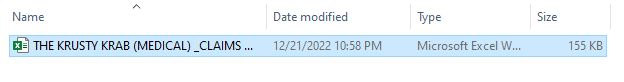

We measured the runtime of the entire notebook using <code>timeit.default_timer()</code> function.

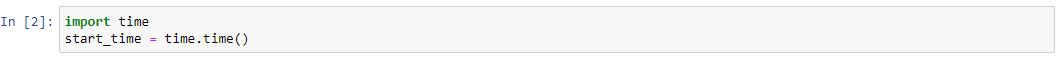

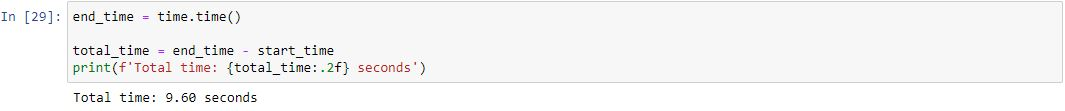

A summary or **utilisation report** that takes five minutes to prepare manually can be completed in just <code>9.60 seconds</code> using this program: